In [14]:
import pandas as pd
import numpy as np

#Импорт данных.

In [15]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Информация о датасете.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


#Процент выживаемости.

In [24]:
df['Pclass'].unique()

array([3, 1, 2])

In [36]:
first_class = df.loc[df['Pclass'] == 1].shape[0]
second_class = df.loc[df['Pclass'] == 2].shape[0]
third_class = df.loc[df['Pclass'] == 3].shape[0]

In [50]:
print(f'Пассажиров первого класса всего: {first_class}'
        f'\nПассажиров второго класса всего: {second_class}'
        f'\nПассажиров третьего класса всего: {third_class}')

Пассажиров первого класса всего: 216
Пассажиров второго класса всего: 184
Пассажиров третьего класса всего: 491


In [56]:
alive = {1: df.groupby(['Pclass'])['Survived'].sum()[1],
         2: df.groupby(['Pclass'])['Survived'].sum()[2],
         3: df.groupby(['Pclass'])['Survived'].sum()[3]}

In [58]:
print(f'Пассажиров первого класса выжило: {alive[1]}'
        f'\nПассажиров второго класса выжило: {alive[2]}'
        f'\nПассажиров третьего класса выжило: {alive[3]}')

Пассажиров первого класса выжило: 136
Пассажиров второго класса выжило: 87
Пассажиров третьего класса выжило: 119


In [61]:
alive_percent = {1: round(100 * alive[1] / first_class, 2),
                 2: round(100 * alive[2] / second_class, 2),
                 3: round(100 * alive[3] / third_class, 2)}

In [62]:
print(f'Процент выживших из первого класса: {alive_percent[1]}'
        f'\nПроцент выживших из первого класса: {alive_percent[2]}'
        f'\nПроцент выживших из первого класса: {alive_percent[3]}')

Процент выживших из первого класса: 62.96
Процент выживших из первого класса: 47.28
Процент выживших из первого класса: 24.24


<Axes: title={'center': 'Процент выживаемости пассажиров'}, xlabel='Класс', ylabel='Выживших, %'>

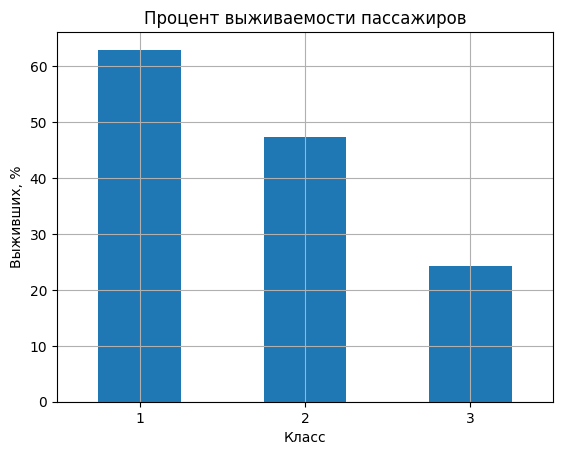

In [79]:
pd.Series(alive_percent).plot(kind='bar',
                              rot=0,
                              title='Процент выживаемости пассажиров',
                              xlabel='Класс',
                              ylabel='Выживших, %',
                              grid=True)

#Популярные имена.

In [105]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [124]:
male_names = df.loc[df['Sex'] == 'male']['Name']
female_names = df.loc[df['Sex'] == 'female']['Name']

In [113]:
def find_names(st):
    all_names = []
    all_names.append(st.split()[0].rstrip(','))
    return all_names

In [125]:
male_surnames = []
female_surnames = []
for i in male_names:
    male_surnames.append(find_names(i))
for i in female_names:
    female_surnames.append(find_names(i))

In [144]:
def find_freq(d_list):
    k = 1
    for i in d_list:
        if d_list.count(i) > k:
            res = i
            k = d_list.count(i)
    return *res, k

In [145]:
print(f'Самое популярное мужское имя на корабле {find_freq(male_surnames)[0]}, таких пассажиров было {find_freq(male_surnames)[1]}')
print(f'Самое популярное женское имя на корабле {find_freq(female_surnames)[0]}, таких пассажиров было {find_freq(female_surnames)[1]}')

Самое популярное мужское имя на корабле Panula, таких пассажиров было 5
Самое популярное женское имя на корабле Andersson, таких пассажиров было 6


#Популярные имена по классам.

In [155]:
first_male_names = df.loc[(df['Sex'] == 'male') & (df['Pclass'] == 1), 'Name']
second_male_names = df.loc[(df['Sex'] == 'male') & (df['Pclass'] == 2), 'Name']
third_male_names = df.loc[(df['Sex'] == 'male') & (df['Pclass'] == 3), 'Name']
first_female_names = df.loc[(df['Sex'] == 'female') & (df['Pclass'] == 1), 'Name']
second_female_names = df.loc[(df['Sex'] == 'female') & (df['Pclass'] == 2), 'Name']
third_female_names = df.loc[(df['Sex'] == 'female') & (df['Pclass'] == 3), 'Name']

In [156]:
first_male_surnames = []
second_male_surnames = []
third_male_surnames = []
first_female_surnames = []
second_female_surnames = []
third_female_surnames = []
for i in first_male_names:
    first_male_surnames.append(find_names(i))
for i in second_male_names:
    second_male_surnames.append(find_names(i))
for i in third_male_names:
    third_male_surnames.append(find_names(i))
for i in first_female_names:
    first_female_surnames.append(find_names(i))
for i in second_female_names:
    second_female_surnames.append(find_names(i))
for i in third_female_names:
    third_female_surnames.append(find_names(i))

In [157]:
print(f'Самое популярное мужское имя 1 класса {find_freq(first_male_surnames)[0]}, таких пассажиров было {find_freq(first_male_surnames)[1]}')
print(f'Самое популярное мужское имя 2 класса {find_freq(second_male_surnames)[0]}, таких пассажиров было {find_freq(second_male_surnames)[1]}')
print(f'Самое популярное мужское имя 3 класса {find_freq(third_male_surnames)[0]}, таких пассажиров было {find_freq(third_male_surnames)[1]}')
print(f'Самое популярное женское имя 1 класса {find_freq(first_female_surnames)[0]}, таких пассажиров было {find_freq(first_female_surnames)[1]}')
print(f'Самое популярное женское имя 2 класса {find_freq(second_female_surnames)[0]}, таких пассажиров было {find_freq(second_female_surnames)[1]}')
print(f'Самое популярное женское имя 3 класса {find_freq(third_female_surnames)[0]}, таких пассажиров было {find_freq(third_female_surnames)[1]}')

Самое популярное мужское имя 1 класса Fortune, таких пассажиров было 2
Самое популярное мужское имя 2 класса Hickman, таких пассажиров было 3
Самое популярное мужское имя 3 класса Panula, таких пассажиров было 5
Самое популярное женское имя 1 класса Fortune, таких пассажиров было 2
Самое популярное женское имя 2 класса Laroche, таких пассажиров было 2
Самое популярное женское имя 3 класса Andersson, таких пассажиров было 6


#Пассажиры старше 44 лет.

In [164]:
df[df['Age'] > 44]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S


#Мужчины младше 44 лет.

In [165]:
df.loc[(df['Age'] < 44) & (df['Sex'] == 'male')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.050,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.500,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C


#Количество n-местных кабин.

In [174]:
df_1 = df.groupby(['Cabin']).sum()

In [175]:
df_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Cabin,,,,,,,,,,,
A10,584,0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.1250,C
A14,476,0,1,"Clifford, Mr. George Quincy",male,0.0,0,0,110465,52.0000,S
A16,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,C
A19,285,0,1,"Smith, Mr. Richard William",male,0.0,0,0,113056,26.0000,S
A20,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,C
...,...,...,...,...,...,...,...,...,...,...,...
F33,930,3,6,"Nye, Mrs. (Elizabeth Ramell)Brown, Miss. Ameli...",femalefemalefemale,87.0,0,0,C.A. 29395248733C.A. 34260,34.0000,SSS
F38,777,0,3,"Tobin, Mr. Roger",male,0.0,0,0,383121,7.7500,Q
F4,803,2,4,"Becker, Master. Richard FBecker, Miss. Marion ...",malefemale,5.0,4,2,230136230136,78.0000,SS


In [176]:
def people_calc(d_string):
    return d_string.count('male')


In [181]:
df_1['Pnumber'] = df_1['Sex'].apply(people_calc)

In [183]:
df_1['Pnumber'].value_counts()

,count
Pnumber,
1,101
2,38
3,5
4,3


In [185]:
print('Из данных следует, что на Титанике было 101 одноместная каюта, 38 двухместных, 5 трехместных и 3 четырехместных.')

Из данных следует, что на Титанике было 101 одноместная каюта, 38 двухместных, 5 трехместных и 3 четырехместных.
